# Recap and Theoretical Background: Week 1

This Jupyter notebook provides a ~90-minute recap of two popular function-approximation methods:
1. **Feed-Forward Neural Networks (FFNNs)** for Regression
2. **Gaussian Process Regression (GPR)**

We will illustrate both approaches with analytical 1D and 2D examples:
- A **1D function** $y = \sin(x) + \epsilon$.
- A **2D function** $y = \sin(x_1) + 0.3\cos(x_2) + \epsilon$.

## Outline
1. **Background Theory: Feed-Forward Neural Networks**  
   1.1. Neural Networks as Function Approximators  
   1.2. Universal Approximation Theorem  
   1.3. Training via Gradient-Based Methods  
2. **Feed-Forward Neural Networks in Practice (1D & 2D Examples)**
3. **Background Theory: Gaussian Process Regression**  
   3.1. GP as a Prior over Functions  
   3.2. GP Posterior (Mean & Covariance)  
   3.3. Kernels (Covariance Functions)
4. **Gaussian Process Regression in Practice (1D & 2D Examples)**
5. **Comparison and Closing Remarks**

---

## 1. Background Theory: Feed-Forward Neural Networks

### 1.1 Neural Networks as Function Approximators
A (feed-forward) neural network, often referred to as a Multi-Layer Perceptron (MLP), is a **parametric** model that maps an input $\mathbf{x}$ to an output $y$ through a series of matrix multiplications and nonlinear activation functions. Concretely:

$$
y = f_{\theta}(\mathbf{x}) = W^{(L)} \sigma\bigl(W^{(L-1)} \sigma(\dots \sigma(W^{(1)}\mathbf{x} + b^{(1)}) + \dots ) + b^{(L-1)}) + b^{(L)}.
$$

- $\theta = \{W^{(l)}, b^{(l)}\}_{l=1}^L$ are the network parameters (weights and biases).
- $\sigma(\cdot)$ is a nonlinear activation (e.g., ReLU, tanh, sigmoid).  
- In **regression**, the final layer often has a linear output (no activation) or no explicit nonlinearity.

### 1.2 Universal Approximation Theorem
The **Universal Approximation Theorem** states that a feed-forward network with at least one hidden layer containing a finite (but potentially large) number of neurons and using a suitable activation function (e.g. sigmoid, ReLU, etc.) can approximate **any** continuous function on compact sets to arbitrary accuracy. While the theorem does not guarantee practical feasibility (it does not address how large the network needs to be or how to optimize it), it underscores neural networks' expressive power as general function approximators.

### 1.3 Training via Gradient-Based Methods
To fit a neural network for regression, we define a **loss function**, most commonly the Mean Squared Error (MSE):

$$
\mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^N (y_i - f_{\theta}(\mathbf{x}_i))^2,
$$

where $(\mathbf{x}_i, y_i)$ are the training data. We then optimize $\theta$ via **backpropagation** (the chain rule) and a gradient-based optimizer (e.g., Stochastic Gradient Descent, Adam). This process updates the weights to minimize the training loss, ideally generalizing to unseen data.

---

## 2. Feed-Forward Neural Networks in Practice

We will:
- Generate synthetic data for **1D** and **2D** functions.
- Train MLPs using scikit-learn’s `MLPRegressor`.
- Evaluate and visualize their performance.

### 2.1 1D Regression with a Feed-Forward Network

Train MSE: 0.0366
Test MSE:  0.0429


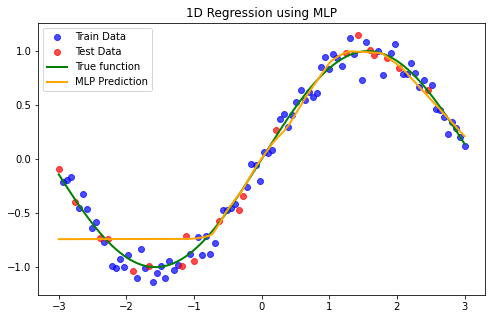

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

###############################################################################
# 1) Generate synthetic 1D data
#    We'll use y = sin(x) + noise.
###############################################################################
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y_true = np.sin(X).ravel()
noise = 0.1 * np.random.randn(100)
y = y_true + noise

# 2) Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Create and train the MLP
# We'll use a small network: 2 hidden layers with 20 units each, ReLU activation.
mlp_1d = MLPRegressor(
    hidden_layer_sizes=(20, 20), 
    activation='relu', 
    solver='adam', 
    max_iter=2000, 
    random_state=42
)
mlp_1d.fit(X_train, y_train)

# 4) Predictions
y_pred_train = mlp_1d.predict(X_train)
y_pred_test = mlp_1d.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE:  {mse_test:.4f}")

# 5) Visualization
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
y_plot_pred = mlp_1d.predict(X_plot)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Train Data', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Data', color='red', alpha=0.7)
plt.plot(X_plot, np.sin(X_plot), label='True function', color='green', linewidth=2)
plt.plot(X_plot, y_plot_pred, label='MLP Prediction', color='orange', linewidth=2)
plt.title('1D Regression using MLP')
plt.legend()
plt.show()

### Discussion
- The **input** is 1D ($x$), the **output** is 1D ($y$).
- We use **ReLU** as the activation function in hidden layers; the network has 2 hidden layers with 20 neurons each.
- The final MSE measures how close our predictions are to the true values.  
- By comparing the MLP’s regression curve with the sine curve, we see how effectively the MLP learned the underlying function (despite noise).

### 2.2 2D Regression with a Feed-Forward Network
We now generate a 2D function:
$$y = \sin(x_1) + 0.3\cos(x_2) + \epsilon.$$
and follow a similar procedure:
1. Generate data.
2. Fit an MLP.
3. Evaluate and visualize.

*Visualization in 2D requires either slicing or a surface plot. We will do a 3D surface plot to compare predicted vs. true surfaces.*

Train MSE (2D): 0.1895
Test MSE (2D):  0.0698


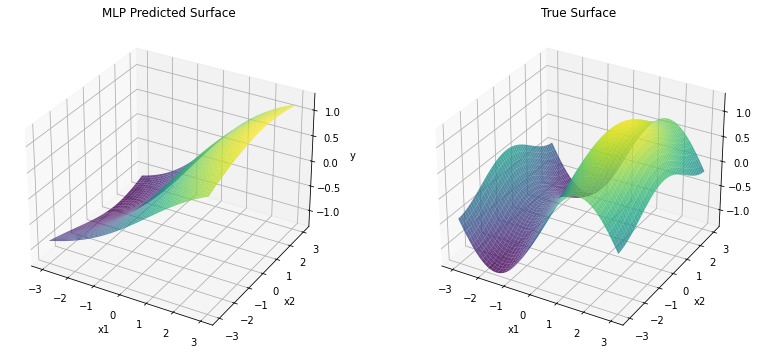

In [2]:
# 1) Generate synthetic 2D data
np.random.seed(123)
n_samples = 200
X1 = np.random.uniform(-3, 3, n_samples)
X2 = np.random.uniform(-3, 3, n_samples)
y_true_2d = np.sin(X1) + 0.3 * np.cos(X2)
noise_2d = 0.1 * np.random.randn(n_samples)
y_2d = y_true_2d + noise_2d

X_2d = np.vstack((X1, X2)).T  # shape: (n_samples, 2)

# 2) Train-test split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=123
)

# 3) Create and train the MLP
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

mlp_2d = MLPRegressor(
    hidden_layer_sizes=(30, 30), 
    activation='tanh', 
    solver='adam', 
    max_iter=3000, 
    random_state=123
)
mlp_2d.fit(X_train_2d, y_train_2d)

# 4) Predictions
y_pred_train_2d = mlp_2d.predict(X_train_2d)
y_pred_test_2d = mlp_2d.predict(X_test_2d)
mse_train_2d = mean_squared_error(y_train_2d, y_pred_train_2d)
mse_test_2d = mean_squared_error(y_test_2d, y_pred_test_2d)

print(f"Train MSE (2D): {mse_train_2d:.4f}")
print(f"Test MSE (2D):  {mse_test_2d:.4f}")

# 5) Visualization
grid_x = np.linspace(-3, 3, 50)
grid_y = np.linspace(-3, 3, 50)
GX, GY = np.meshgrid(grid_x, grid_y)
X_grid = np.column_stack([GX.ravel(), GY.ravel()])

Z_pred = mlp_2d.predict(X_grid).reshape(GX.shape)
Z_true = (np.sin(GX) + 0.3 * np.cos(GY)).reshape(GX.shape)

fig = plt.figure(figsize=(12, 5))
# MLP-predicted surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(GX, GY, Z_pred, cmap='viridis', alpha=0.8)
ax1.set_title('MLP Predicted Surface')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')

# True function surface
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(GX, GY, Z_true, cmap='viridis', alpha=0.8)
ax2.set_title('True Surface')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')

plt.tight_layout()
plt.show()

## 3. Background Theory: Gaussian Process Regression

### 3.1 GP as a Prior over Functions
A **Gaussian Process (GP)** defines a prior over functions $f(\cdot)$. It is fully determined by:
- A **mean function** $m(\mathbf{x})$ (often taken to be zero in practice, without loss of generality).
- A **covariance function** or **kernel** $k(\mathbf{x}, \mathbf{x}')$.  

We write:

$$
f(\mathbf{x}) \sim \mathcal{GP}\bigl(m(\mathbf{x}), k(\mathbf{x},\mathbf{x}')\bigr).
$$

This means that, for any finite set of points $(\mathbf{x}_1, \ldots, \mathbf{x}_N)$, the function values $(f(\mathbf{x}_1), \ldots, f(\mathbf{x}_N))$ follow a **multivariate Gaussian distribution**.

### 3.2 GP Posterior (Mean & Covariance)
Given training data $\{(\mathbf{x}_i, y_i)\}_{i=1}^N$ (we typically assume $y_i = f(\mathbf{x}_i) + \epsilon_i$ with i.i.d. Gaussian noise $\epsilon_i \sim \mathcal{N}(0, \sigma_n^2)$), the **posterior** distribution over $f(\cdot)$ at a new test point $\mathbf{x}_*$ is also Gaussian. We obtain:

$$
f(\mathbf{x}_*) \mid X, \mathbf{y}, \mathbf{x}_* \sim \mathcal{N}(\mu_*, \sigma_*^2),
$$

where:

$$
\mu_* = k_*^T (K + \sigma_n^2 I)^{-1} \mathbf{y}, \quad
\sigma_*^2 = k(\mathbf{x}_*, \mathbf{x}_*) - k_*^T (K + \sigma_n^2 I)^{-1} k_*,
$$

- $k_*$ is the covariance vector between $\mathbf{x}_*$ and the training inputs.
- $K$ is the covariance matrix of training inputs (size $N\times N$).

Thus, GPs provide not only a **mean prediction** but also a natural **measure of uncertainty** (the predictive variance) at each test point.

### 3.3 Kernels (Covariance Functions)
Common kernel choices include:
- **RBF/SE (Radial Basis Function / Squared Exponential)**: $k(\mathbf{x}, \mathbf{x}') = \exp(-\|\mathbf{x}-\mathbf{x}'\|^2 / (2\ell^2))$.
- **Matern** family, **Rational Quadratic**, etc.
Kernels can be combined (sums/products) to capture more complex structures. Hyperparameters (length scale $\ell$, amplitude $\sigma_f$, noise variance $\sigma_n^2$, etc.) are typically learned by **maximizing the marginal likelihood**.

---

## 4. Gaussian Process Regression in Practice
We'll replicate the same tasks as with the MLPs:
- **1D regression** on $y = \sin(x) + \epsilon$.
- **2D regression** on $y = \sin(x_1) + 0.3\cos(x_2) + \epsilon$.

Using scikit-learn, we can set up a `GaussianProcessRegressor` with a kernel. Let’s start with the 1D case.

### 4.1 1D Regression with Gaussian Processes

GP 1D Regression
Train MSE: 0.0080
Test MSE:  0.0063
Optimized Kernel:
 1.61**2 * RBF(length_scale=2.25) + WhiteKernel(noise_level=0.00863)


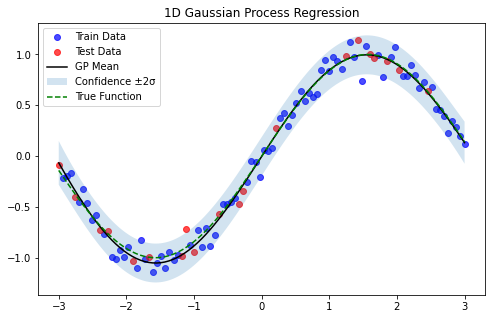

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

# Reuse the 1D data: X_train, X_test, y_train, y_test.
# 1) Define a kernel: we combine a constant kernel and RBF, plus WhiteKernel for noise.
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel()

# 2) Create and fit the Gaussian Process
gp_1d = GaussianProcessRegressor(
    kernel=kernel, 
    n_restarts_optimizer=5, 
    random_state=42
)
gp_1d.fit(X_train, y_train)

# 3) Predictions
y_pred_gp_train, y_pred_gp_train_std = gp_1d.predict(X_train, return_std=True)
y_pred_gp_test, y_pred_gp_test_std = gp_1d.predict(X_test, return_std=True)
mse_train_gp_1d = mean_squared_error(y_train, y_pred_gp_train)
mse_test_gp_1d = mean_squared_error(y_test, y_pred_gp_test)

print("GP 1D Regression")
print(f"Train MSE: {mse_train_gp_1d:.4f}")
print(f"Test MSE:  {mse_test_gp_1d:.4f}")
print("Optimized Kernel:\n", gp_1d.kernel_)

# 4) Visualization
X_plot_1d = np.linspace(-3, 3, 200).reshape(-1, 1)
y_mean_1d, y_std_1d = gp_1d.predict(X_plot_1d, return_std=True)

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, label='Train Data', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Data', color='red', alpha=0.7)
plt.plot(X_plot_1d, y_mean_1d, 'k', label='GP Mean')
plt.fill_between(
    X_plot_1d.ravel(),
    y_mean_1d - 2 * y_std_1d,
    y_mean_1d + 2 * y_std_1d,
    alpha=0.2, label='Confidence ±2σ'
)
plt.plot(X_plot_1d, np.sin(X_plot_1d), 'g--', label='True Function')
plt.title('1D Gaussian Process Regression')
plt.legend()
plt.show()

### Discussion
- The GP learns both the **mean** (solid line) and the **uncertainty** (shaded area).  
- The WhiteKernel component handles noise (increasing the diagonal of the covariance matrix).  
- The RBF kernel length scale determines how quickly correlation decays with distance in $x$.  
- Notice how the GP’s uncertainty grows where there is less training data.

---

### 4.2 2D Regression with Gaussian Processes

GP 2D Regression
Train MSE: 0.0079
Test MSE:  0.0111
Optimized Kernel:
 0.755**2 * RBF(length_scale=[1.53, 2.4]) + WhiteKernel(noise_level=0.00929)


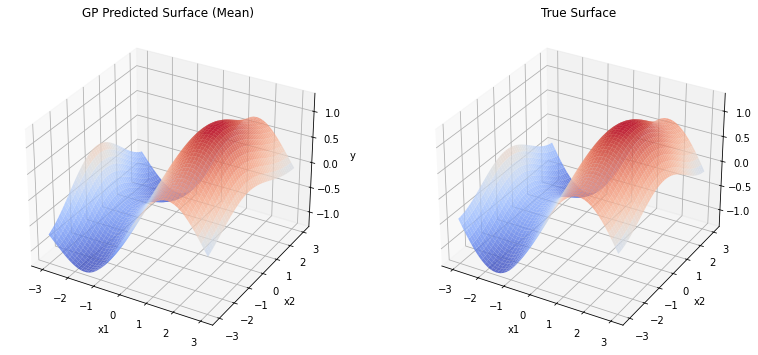

In [4]:
# Reuse the 2D data: X_train_2d, X_test_2d, y_train_2d, y_test_2d
kernel_2d = C(1.0, (1e-3, 1e3)) * RBF(length_scale=[1.0, 1.0], length_scale_bounds=(1e-2, 1e2)) + WhiteKernel()

gp_2d = GaussianProcessRegressor(
    kernel=kernel_2d, 
    n_restarts_optimizer=5, 
    random_state=123
)
gp_2d.fit(X_train_2d, y_train_2d)

y_pred_2d_train_gp, y_std_2d_train_gp = gp_2d.predict(X_train_2d, return_std=True)
y_pred_2d_test_gp, y_std_2d_test_gp = gp_2d.predict(X_test_2d, return_std=True)

mse_train_gp_2d = mean_squared_error(y_train_2d, y_pred_2d_train_gp)
mse_test_gp_2d = mean_squared_error(y_test_2d, y_pred_2d_test_gp)

print("GP 2D Regression")
print(f"Train MSE: {mse_train_gp_2d:.4f}")
print(f"Test MSE:  {mse_test_gp_2d:.4f}")
print("Optimized Kernel:\n", gp_2d.kernel_)

# Visualization on a grid
grid_x = np.linspace(-3, 3, 50)
grid_y = np.linspace(-3, 3, 50)
GX, GY = np.meshgrid(grid_x, grid_y)
X_grid = np.column_stack([GX.ravel(), GY.ravel()])

Z_pred_gp_2d, Z_std_gp_2d = gp_2d.predict(X_grid, return_std=True)
Z_pred_gp_2d = Z_pred_gp_2d.reshape(GX.shape)

Z_true = (np.sin(GX) + 0.3 * np.cos(GY)).reshape(GX.shape)

fig = plt.figure(figsize=(12, 5))
# Predicted GP surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(GX, GY, Z_pred_gp_2d, cmap='coolwarm', alpha=0.8)
ax1.set_title('GP Predicted Surface (Mean)')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')

# True function surface
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(GX, GY, Z_true, cmap='coolwarm', alpha=0.8)
ax2.set_title('True Surface')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')

plt.tight_layout()
plt.show()

## 5. Comparison & Closing Remarks

We compared **Feed-Forward Neural Networks** and **Gaussian Process Regression** on the same 1D and 2D synthetic tasks:

### Feed-Forward Neural Networks
- **Pros**: 
  1. Highly flexible; can handle large datasets more easily.
  2. Universal function approximators.
  3. Easy to include advanced architectures (e.g., deeper nets, skip connections).
- **Cons**: 
  1. No built-in uncertainty estimate (though Bayesian neural networks or dropout approximations exist). 
  2. Many hyperparameters to tune (layers, neurons, activations, regularization).

### Gaussian Process Regression
- **Pros**:
  1. Natural **uncertainty quantification**.
  2. Strong theoretical foundation; often performs well on smaller datasets.
  3. Kernel flexibility helps capture various structures.
- **Cons**:
  1. $O(N^3)$ complexity can become prohibitive for large datasets.
  2. Kernel choice and hyperparameter tuning can be non-trivial.

### Conclusions
- Both methods can approximate complex functions effectively.  
- **Neural networks** may scale better for large data and more complicated tasks.
- **Gaussian Processes** provide a probabilistic framework and uncertainty estimates, at higher computational cost.

## Further Reading
- **Christopher M. Bishop**, *Pattern Recognition and Machine Learning.*  
- **Carl Edward Rasmussen** & **Christopher K. I. Williams**, *Gaussian Processes for Machine Learning.*  
- scikit-learn documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

This concludes our more in-depth recap of **Feed-Forward Neural Networks** and **Gaussian Process Regression**!